In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (9, 7)
mpl.rcParams['font.size'] = 15

In [4]:
from lookatthisgraph.utils.dataset import Dataset

In [5]:
train_set = Dataset(['/home/iwsatlas1/haminh/IceCube/graphnet/converted/level3/140000/'])

2020-09-21 15:34:49,195: Loading and preprocessing events, this might take a while
2020-09-21 15:34:49,197: Warning: Number of input files unknown
2020-09-21 15:34:57,124: 251256 events received
2020-09-21 15:35:07,654: Data processing complete


In [6]:
from lookatthisgraph.utils.trainer import Trainer

In [7]:
train_config = {
    'learning_rate': 7e-4,
    'scheduling_step_size': 30,
    'scheduling_gamma': .7,
    'training_target': 'energy',
    'dataset': train_set,
    'train_split': 2e3,
    'test_split': 1e5,
    'batch_size': 1024,
    'max_epochs': 100,
}

In [19]:
trainer = Trainer(train_config)

2020-09-21 15:38:40,068: 2000 training samples, 1024 validation samples, 100000 test samples received; 148232 ununsed


In [20]:
trainer.train()

2020-09-21 15:38:41,223: Learning rate changed to 0.000700 in epoch 0
2020-09-21 15:38:41,224: Training loss: 1.530e+00 | Validation loss: 2.167e+00 | Epoch 0 / 100 | Min validation loss: 2.167e+00 at epoch 0
2020-09-21 15:38:42,173: Training loss: 1.094e+00 | Validation loss: 1.788e+00 | Epoch 1 / 100 | Min validation loss: 1.788e+00 at epoch 1
2020-09-21 15:38:43,042: Training loss: 1.064e+00 | Validation loss: 8.618e-01 | Epoch 2 / 100 | Min validation loss: 8.618e-01 at epoch 2
2020-09-21 15:38:43,906: Training loss: 5.371e-01 | Validation loss: 7.302e-01 | Epoch 3 / 100 | Min validation loss: 7.302e-01 at epoch 3
2020-09-21 15:38:44,529: Training loss: 3.666e-01 | Validation loss: 5.845e-01 | Epoch 4 / 100 | Min validation loss: 5.845e-01 at epoch 4
2020-09-21 15:38:45,303: Training loss: 2.964e-01 | Validation loss: 4.122e-01 | Epoch 5 / 100 | Min validation loss: 4.122e-01 at epoch 5
2020-09-21 15:38:46,088: Training loss: 2.101e-01 | Validation loss: 3.909e-01 | Epoch 6 / 100 |

2020-09-21 15:39:27,593: Training loss: 5.869e-02 | Validation loss: 1.338e-01 | Epoch 57 / 100 | Min validation loss: 1.322e-01 at epoch 56
2020-09-21 15:39:28,233: Training loss: 5.587e-02 | Validation loss: 1.340e-01 | Epoch 58 / 100 | Min validation loss: 1.322e-01 at epoch 56
2020-09-21 15:39:29,108: Training loss: 5.430e-02 | Validation loss: 1.687e-01 | Epoch 59 / 100 | Min validation loss: 1.322e-01 at epoch 56
2020-09-21 15:39:29,753: Learning rate changed to 0.000240 in epoch 60
2020-09-21 15:39:29,754: Training loss: 6.631e-02 | Validation loss: 1.429e-01 | Epoch 60 / 100 | Min validation loss: 1.322e-01 at epoch 56
2020-09-21 15:39:30,454: Learning rate changed to 0.000343 in epoch 61
2020-09-21 15:39:30,455: Training loss: 6.348e-02 | Validation loss: 1.373e-01 | Epoch 61 / 100 | Min validation loss: 1.322e-01 at epoch 56
2020-09-21 15:39:31,327: Training loss: 5.631e-02 | Validation loss: 1.360e-01 | Epoch 62 / 100 | Min validation loss: 1.322e-01 at epoch 56
2020-09-21 1

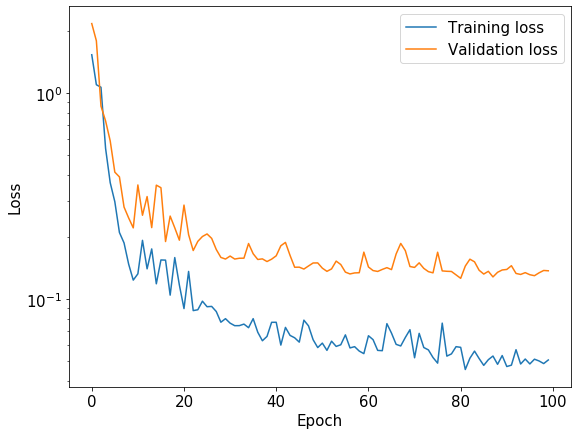

In [22]:
import numpy as np
plt.figure()
plt.plot(np.arange(len(trainer.train_losses)), trainer.train_losses, label='Training loss')
plt.plot(np.arange(len(trainer.train_losses)), trainer.validation_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

In [23]:
trainer.load_best_model()

2020-09-21 15:40:26,596: Best model loaded


In [24]:
prediction, truth = trainer.evaluate_test_samples()

2020-09-21 15:40:27,358: Best model loaded



[[ 0.7739151   0.63328934  0.999426    1.        ]
 [ 0.2016852  -0.9794504   0.441266    1.        ]
 [ 0.22959438  0.9732864   1.4184209   1.        ]
 ...
 [ 0.8296664   0.5582595   2.308401    1.        ]
 [ 0.44699576 -0.8945361   1.9678271   1.        ]
 [ 0.8602713  -0.50983655  1.1314731   1.        ]]


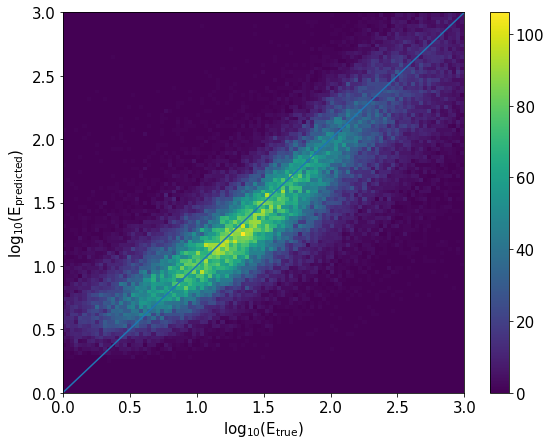

In [25]:
plt.figure()
bins = np.linspace(0,3,100)
plt.hist2d(truth['energy'].flatten(), prediction, bins=[bins,bins])
plt.plot(bins, bins)
plt.colorbar()
plt.ylabel(r'$\mathregular{log_{10}(E_{predicted})}$')
plt.xlabel(r'$\mathregular{log_{10}(E_{true})}$')
plt.show()

In [26]:
trainer.save_network_info('test.p')

/home/iwsatlas1/haminh/IceCube/deepLearning/tf1/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)
2020-09-21 15:41:08,388: Network dictionary saved


{'file_names': ['/home/iwsatlas1/haminh/IceCube/graphnet/converted/level3/140000'],
 'training_target': 'energy',
 'source_dim': 5,
 'target_dim': 1,
 'classification': False,
 'n_total': 251256,
 'n_train': 2000,
 'n_val': 1024,
 'n_test': 100000,
 'batch_size': 1024,
 'normalization_parameters': (array([[ 3.4287449e+01,  1.0472746e+02],
         [-3.0587448e+01,  9.7032852e+01],
         [-3.3010883e+02,  1.1615600e+02],
         [ 1.0635539e+04,  1.0818705e+03],
         [-8.2687497e-02,  2.8002730e-01]], dtype=float32), 'gauss'),
 'loss_function': 'MSELoss()',
 'net': ConvNet(
   (conv1): TAGConv(5, 128, K=2)
   (conv2): TAGConv(128, 128, K=2)
   (conv3): TAGConv(128, 128, K=2)
   (batchnorm1): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear1): Linear(in_features=768, out_features=768, bias=True)
   (linear2): Linear(in_features=768, out_features=768, bias=True)
   (linear3): Linear(in_features=768, out_features=768, bias=True)
   (linear

In [27]:
import pickle
info = pickle.load(open('test.p', 'rb'))

In [28]:
from lookatthisgraph.utils.model import Model

In [29]:
m = Model(info)

In [31]:
test_set = Dataset(['/home/iwsatlas1/haminh/IceCube/graphnet/converted/level3/140000/'], info['normalization_parameters'][0])

2020-09-21 15:41:52,309: Loading and preprocessing events, this might take a while
2020-09-21 15:41:52,310: Warning: Number of input files unknown
2020-09-21 15:42:00,186: 251256 events received
2020-09-21 15:42:06,404: Normalization parameters received, overwriting existing parameters
2020-09-21 15:42:09,910: Data processing complete


In [21]:
m.set_device_type('cpu')

In [ ]:
p, t = m.evaluate_dataset(test_set, 1024)

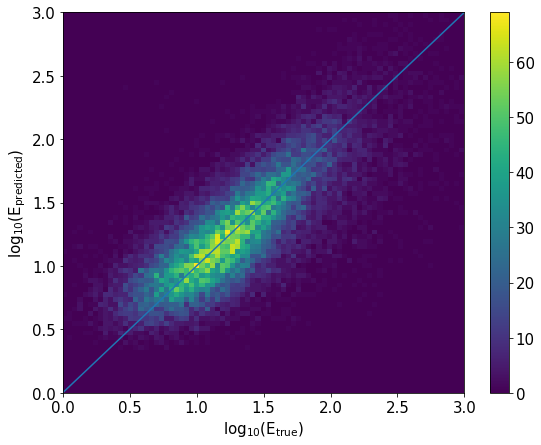

In [25]:
plt.figure()
bins = np.linspace(0,3,80)
plt.hist2d(t['energy'].flatten(), p.flatten(), bins=[bins, bins])
plt.plot(bins,bins)
plt.ylabel(r'$\mathregular{log_{10}(E_{predicted})}$')
plt.xlabel(r'$\mathregular{log_{10}(E_{true})}$')
plt.colorbar()
plt.show()